In [9]:
pip install tensorflow pandas matplotlib seaborn


            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8


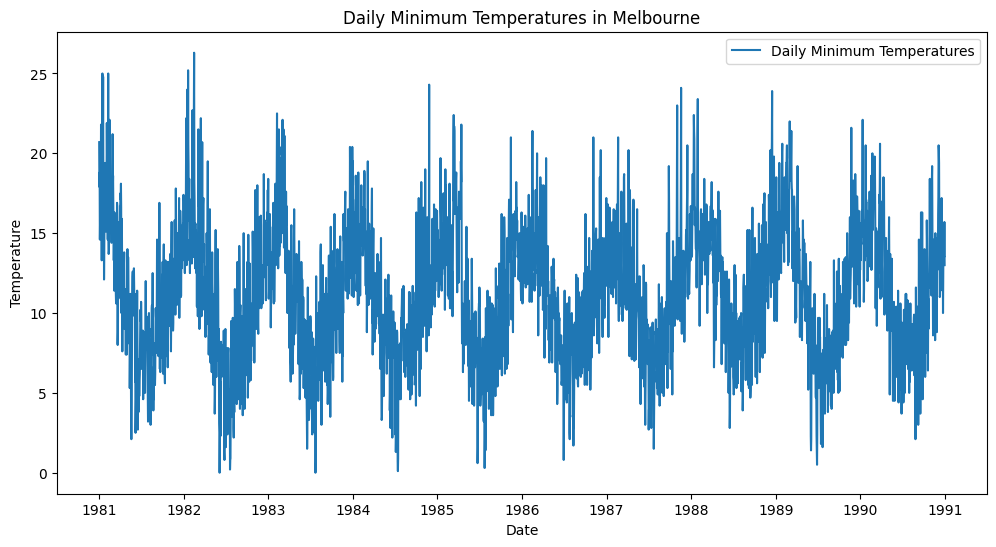

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout

# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
df = pd.read_csv(url, parse_dates=['Date'], index_col='Date')

# Display the first few rows of the dataset
print(df.head())

# Plotting the time series
plt.figure(figsize=(12, 6))
plt.plot(df, label='Daily Minimum Temperatures')
plt.title('Daily Minimum Temperatures in Melbourne')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()


In [11]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df)

# Convert to supervised learning
def create_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back - 1):
        a = data[i:(i + look_back), 0]
        X.append(a)
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 10
X, y = create_dataset(df_scaled, look_back)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


Epoch 1/50
91/91 [==============================] - 3s 11ms/step - loss: 0.0753 - val_loss: 0.0149
Epoch 2/50
91/91 [==============================] - 1s 8ms/step - loss: 0.0239 - val_loss: 0.0083
Epoch 3/50
91/91 [==============================] - 1s 7ms/step - loss: 0.0192 - val_loss: 0.0090
Epoch 4/50
91/91 [==============================] - 1s 7ms/step - loss: 0.0169 - val_loss: 0.0079
Epoch 5/50
91/91 [==============================] - 1s 8ms/step - loss: 0.0149 - val_loss: 0.0078
Epoch 6/50
91/91 [==============================] - 1s 8ms/step - loss: 0.0138 - val_loss: 0.0079
Epoch 7/50
91/91 [==============================] - 1s 7ms/step - loss: 0.0133 - val_loss: 0.0079
Epoch 8/50
91/91 [==============================] - 1s 7ms/step - loss: 0.0125 - val_loss: 0.0079
Epoch 9/50
91/91 [==============================] - 1s 8ms/step - loss: 0.0125 - val_loss: 0.0078
Epoch 10/50
91/91 [==============================] - 1s 8ms/step - loss: 0.0118 - val_loss: 0.0081
Epoch 11/50
91/91 

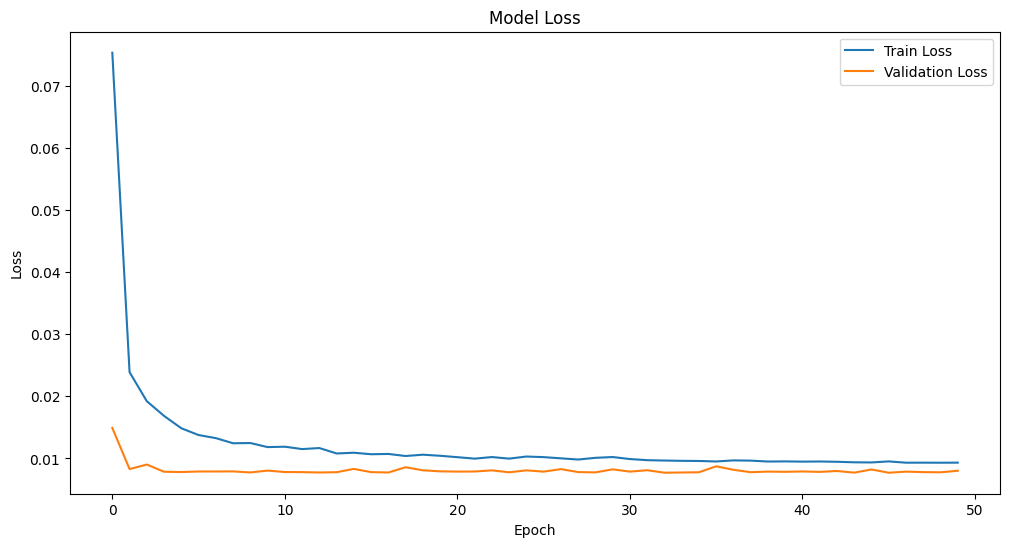

In [12]:
# Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(look_back, 1)))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()
